In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [4]:
filename = "C:/Users/Flora/빅데이터분석공부/창원시 데이터분석/경상남도_창원시_공장등록현황_20210831.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  # or read() if the file is small.
    print(result['encoding'])

UTF-8-SIG


In [5]:
df = pd.read_csv("C:/Users/Flora/빅데이터분석공부/창원시 데이터분석/경상남도_창원시_공장등록현황_20210831.csv", encoding='UTF-8-SIG')
df

,순번,회사명,공장대표주소,업종명,생산품,전화번호,팩스번호
0,1,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",055-547-1438,30331301438
1,2,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),055-271-7772,055-261-7774
2,3,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,055-232-4442,055-232-3663
3,4,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",055-251-3040,055-251-4619
4,5,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,055-603-3106,055-603-3114
...,...,...,...,...,...,...,...
4569,4570,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,055-286-8450,055-286-8453
4570,4571,히트케이(주),"경상남도 창원시 마산합포구 3·15대로 298, 504호(서성동, 경남대학교 창업보육관)",그 외 기타 전자부품 제조업,면상발열체 모듈,NaN,NaN
4571,4572,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,NaN,NaN
4572,4573,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,055-822-8080,NaN


# 순번 없애고 전화번호/팩스번호 없애고
# 대표주소는 창원의 구 5개로 나누기
# 주소로 위도경도 표시해보기
# 회사면에 (사) / (유) 저거 뭔지 검색
# 업종명 분류해보기
# 생산품 분류해보기

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순번      4574 non-null   int64 
 1   회사명     4574 non-null   object
 2   공장대표주소  4574 non-null   object
 3   업종명     4574 non-null   object
 4   생산품     4574 non-null   object
 5   전화번호    4125 non-null   object
 6   팩스번호    3964 non-null   object
dtypes: int64(1), object(6)
memory usage: 250.3+ KB


In [7]:
df = df.drop(['순번','전화번호','팩스번호'], axis = 1)

In [8]:
# 구 칼럼 하나 만들어주기

In [9]:
gulist = df.공장대표주소.str[9:12].tolist()
gulist

['진해구',
 '성산구',
 '마산회',
 '마산회',
 '성산구',
 '의창구',
 '성산구',
 '마산합',
 '마산회',
 '의창구',
 '마산합',
 '마산회',
 '마산회',
 '마산회',
 '마산회',
 '마산회',
 '마산회',
 '마산회',
 '마산회',
 '마산회',
 '진해구',
 '마산회',
 '마산회',
 '마산합',
 '성산구',
 '마산회',
 '의창구',
 '마산회',
 '성산구',
 '의창구',
 '성산구',
 '의창구',
 '마산회',
 '의창구',
 '마산회',
 '마산합',
 '마산회',
 '마산회',
 '의창구',
 '의창구',
 '마산회',
 '의창구',
 '의창구',
 '마산회',
 '성산구',
 '마산합',
 '마산회',
 '성산구',
 '성산구',
 '마산회',
 '성산구',
 '마산합',
 '마산합',
 '성산구',
 '의창구',
 '성산구',
 '성산구',
 '성산구',
 '의창구',
 '마산회',
 '마산합',
 '의창구',
 '마산회',
 '마산회',
 '의창구',
 '성산구',
 '마산합',
 '마산합',
 '성산구',
 '진해구',
 '마산회',
 '의창구',
 '마산합',
 '성산구',
 '성산구',
 '의창구',
 '의창구',
 '성산구',
 '마산합',
 '성산구',
 '마산합',
 '마산회',
 '마산합',
 '마산합',
 '마산합',
 '진해구',
 '성산구',
 '의창구',
 '의창구',
 '성산구',
 '성산구',
 '마산합',
 '성산구',
 '마산회',
 '의창구',
 '마산합',
 '마산회',
 '마산회',
 '의창구',
 '의창구',
 '마산합',
 '의창구',
 '마산합',
 '마산회',
 '의창구',
 '성산구',
 '의창구',
 '성산구',
 '성산구',
 '성산구',
 '성산구',
 '성산구',
 '성산구',
 '의창구',
 '의창구',
 '의창구',
 '마산합',
 '마산합',
 '성산구',
 '마산합',
 '마산회',
 '성산구',
 '의창구',
 '진해구',
 '진해구',


In [10]:
df['구'] = gulist

In [11]:
df

,회사명,공장대표주소,업종명,생산품,구
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구
...,...,...,...,...,...
4569,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,성산구
4570,히트케이(주),"경상남도 창원시 마산합포구 3·15대로 298, 504호(서성동, 경남대학교 창업보육관)",그 외 기타 전자부품 제조업,면상발열체 모듈,마산합
4571,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,성산구
4572,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,의창구


In [12]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

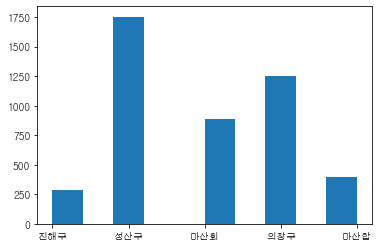

In [13]:
fig = plt.figure()
axis1 = fig.add_subplot(1, 1, 1)

axis1.hist(df['구'])
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     4574 non-null   object
 1   공장대표주소  4574 non-null   object
 2   업종명     4574 non-null   object
 3   생산품     4574 non-null   object
 4   구       4574 non-null   object
dtypes: object(5)
memory usage: 178.8+ KB


In [15]:
# df = df.drop(['공장대표주소'], axis = 1)
# df

In [16]:
df.head(20)

,회사명,공장대표주소,업종명,생산품,구
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구
5,(유)범아산전,경상남도 창원시 의창구 태복산로7번길 1 (도계동),배전반 및 전기 자동제어반 제조업,전기제어부분품,의창구
6,(유)삼송 창원공장,경상남도 창원시 성산구 정동로62번길 30 (성주동) (총 2 필지) 외 1필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차용 안전밸브,성산구
7,(유)송원산업,경상남도 창원시 마산합포구 진북면 망곡리 83-3번지,선박 구성 부분품 제조업,선박의장부품,마산합
8,(유)신신1급자동차정비,경상남도 창원시 마산회원구 내서읍 중리공단로 165 (신신1급자동차정비),건설 및 채광용 기계장비 제조업,운수장비수선(수리업),마산회
9,(유)티에스,경상남도 창원시 의창구 차룡단지로 75-2 (팔용동),절삭가공 및 유사처리업,캠가공 외 항공기 부품,의창구


In [17]:
comlist = df.회사명.str[0:3].tolist()
comlist

['(사)',
 '(윈펠',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(유)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',
 '(주)',


In [18]:
comlist1 = df.회사명.str.contains('(주)').tolist()
comlist1

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,


In [19]:
for i in range(len(comlist)):
    if comlist1[i] == True:
        comlist[i] = '주' 
        
for i in range(len(comlist)):
    if comlist[i] == '(사)':
        comlist[i] = '사' 

for i in range(len(comlist)):
    if comlist[i] == '(유)':
        comlist[i] = '유' 

In [20]:
df['구분'] = comlist

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     4574 non-null   object
 1   공장대표주소  4574 non-null   object
 2   업종명     4574 non-null   object
 3   생산품     4574 non-null   object
 4   구       4574 non-null   object
 5   구분      4574 non-null   object
dtypes: object(6)
memory usage: 214.5+ KB


In [22]:
df.head(20)

,회사명,공장대표주소,업종명,생산품,구,구분
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구,사
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구,(윈펠
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회,유
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회,유
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구,유
5,(유)범아산전,경상남도 창원시 의창구 태복산로7번길 1 (도계동),배전반 및 전기 자동제어반 제조업,전기제어부분품,의창구,유
6,(유)삼송 창원공장,경상남도 창원시 성산구 정동로62번길 30 (성주동) (총 2 필지) 외 1필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차용 안전밸브,성산구,유
7,(유)송원산업,경상남도 창원시 마산합포구 진북면 망곡리 83-3번지,선박 구성 부분품 제조업,선박의장부품,마산합,유
8,(유)신신1급자동차정비,경상남도 창원시 마산회원구 내서읍 중리공단로 165 (신신1급자동차정비),건설 및 채광용 기계장비 제조업,운수장비수선(수리업),마산회,유
9,(유)티에스,경상남도 창원시 의창구 차룡단지로 75-2 (팔용동),절삭가공 및 유사처리업,캠가공 외 항공기 부품,의창구,유


In [23]:
frame = df.loc[df["구분"] == "주"]
frame1= df.loc[df["구분"] == "유"]
frame2= df.loc[df["구분"] == "사"]
frametotal = pd.concat([frame2,frame1, frame],axis=0)
frametotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 0 to 4570
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2242 non-null   object
 1   공장대표주소  2242 non-null   object
 2   업종명     2242 non-null   object
 3   생산품     2242 non-null   object
 4   구       2242 non-null   object
 5   구분      2242 non-null   object
dtypes: object(6)
memory usage: 122.6+ KB


In [24]:
frametotal.head()

,회사명,공장대표주소,업종명,생산품,구,구분
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구,사
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회,유
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회,유
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구,유
5,(유)범아산전,경상남도 창원시 의창구 태복산로7번길 1 (도계동),배전반 및 전기 자동제어반 제조업,전기제어부분품,의창구,유


In [25]:
# newdf = pd.merge(df, frametotal, how = 'left')
# newdf

In [26]:
df

,회사명,공장대표주소,업종명,생산품,구,구분
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구,사
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구,(윈펠
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회,유
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회,유
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구,유
...,...,...,...,...,...,...
4569,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,성산구,희성테
4570,히트케이(주),"경상남도 창원시 마산합포구 3·15대로 298, 504호(서성동, 경남대학교 창업보육관)",그 외 기타 전자부품 제조업,면상발열체 모듈,마산합,주
4571,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,성산구,히팅플
4572,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,의창구,힐데갈


In [27]:
anydf = df[~((df['구분'] == '주') | (df['구분'] == '유') |(df['구분'] == '사'))]

In [28]:
anylist = anydf.구분.tolist()
anylist

['(윈펠',
 '2ni',
 'AB&',
 'ART',
 'AZA',
 'B&P',
 'BNG',
 'BS ',
 'CG테',
 'CM-',
 'CNC',
 'CON',
 'D.S',
 'DST',
 'E &',
 'E.D',
 'E.S',
 'F&C',
 'F, ',
 'FAB',
 'FC-',
 'GM테',
 'G-T',
 'HA엔',
 'HE ',
 'HIG',
 'HIM',
 'HK테',
 'HOE',
 'ID ',
 'IME',
 'J&S',
 'JD전',
 'J-F',
 'JI테',
 'JTS',
 'JUN',
 'K&K',
 'K.M',
 'K.T',
 'KAM',
 'KFA',
 'KG1',
 'KMT',
 'KM테',
 'KPS',
 'Mad',
 'M-D',
 'MOD',
 'M-T',
 'MTS',
 'MTS',
 'NAF',
 'NC정',
 'NIC',
 'O.K',
 'One',
 'POS',
 'SAF',
 'SD정',
 'SD정',
 'SEB',
 'SEJ',
 'SGM',
 'Sin',
 'SJ ',
 'SJ상',
 'SJ테',
 'SMC',
 'SMS',
 'SMT',
 'SM엔',
 'SM엠',
 'SM치',
 'SM테',
 'SS ',
 'SSM',
 'S-W',
 'TG ',
 'TGM',
 'TTR',
 'UL테',
 'V.C',
 'WES',
 'WJ스',
 'YED',
 '가가E',
 '가고파',
 '가나안',
 '가남엠',
 '가람테',
 '가림건',
 '가림건',
 '가야정',
 '가야정',
 '가야테',
 '가야테',
 '가야테',
 '가온라',
 '가온텍',
 '간판백',
 '감익는',
 '강남샷',
 '강동금',
 '강동정',
 '강림엔',
 '강성정',
 '강성테',
 '강호정',
 '거명테',
 '거산기',
 '거산마',
 '거산목',
 '거산정',
 '거성산',
 '거성정',
 '거성정',
 '거성정',
 '거성정',
 '거성정',
 '거성테',
 '건보테',
 '건양정',
 '건우금',
 '건우스',


In [29]:
# if ((df['구분'] != '주') & (df['구분'] != '유') & (df['구분'] != '사')):
#     df['구분'] = '기타'

In [30]:
# if ~((df['구분'] == '주') | (df['구분'] == '유') |(df['구분'] == '사')):
#       df['구분'] = '기타'

In [31]:
df.loc[(~df.구분.str.contains('주')), '구분'] = '기타'

In [32]:
df

,회사명,공장대표주소,업종명,생산품,구,구분
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구,기타
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구,기타
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회,기타
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회,기타
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구,기타
...,...,...,...,...,...,...
4569,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,성산구,기타
4570,히트케이(주),"경상남도 창원시 마산합포구 3·15대로 298, 504호(서성동, 경남대학교 창업보육관)",그 외 기타 전자부품 제조업,면상발열체 모듈,마산합,주
4571,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,성산구,기타
4572,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,의창구,기타


In [33]:
new_df = df['구분']

In [34]:
new_df

0       기타
1       기타
2       기타
3       기타
4       기타
        ..
4569    기타
4570     주
4571    기타
4572    기타
4573    기타
Name: 구분, Length: 4574, dtype: object

In [35]:
df[df['구분']=='기타']

,회사명,공장대표주소,업종명,생산품,구,구분
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구,기타
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구,기타
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회,기타
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회,기타
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구,기타
...,...,...,...,...,...,...
4568,흥진항공산업,"경상남도 창원시 의창구 사화로 222-20 (팔용동, 흥진기계)",육상 금속 골조 구조재 제조업 외 3 종,항공기기체부품 등,의창구,기타
4569,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,성산구,기타
4571,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,성산구,기타
4572,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,의창구,기타


In [36]:
df[df['구분']=='주']

,회사명,공장대표주소,업종명,생산품,구,구분
13,(주) 미래테크원,"경상남도 창원시 마산회원구 봉암공단7길 19 (봉암동, 주택)",그 외 기타 전자부품 제조업 외 1 종,전자부품(하네스),마산회,주
14,(주) 아이엔테크,경상남도 창원시 마산회원구 봉암공단4길 165 (봉암동),그 외 기타 전기장비 제조업,자동화세척기,마산회,주
15,(주) 영창기업,"경상남도 창원시 마산회원구 봉암공단로 59-17 (봉암동, 영창)",배전반 및 전기 자동제어반 제조업,공작기계 부품,마산회,주
16,(주) 은성,"경상남도 창원시 마산회원구 회원동16길 47, 2층 (회원동, 동북산업)",컴퓨터 제조업,컴퓨터 부품,마산회,주
17,(주) 제이에이치테크,경상남도 창원시 마산회원구 봉암공단5길 12 (봉암동) 외 1필지,그 외 자동차용 신품 부품 제조업 외 3 종,"자동차부품, 유압부품",마산회,주
...,...,...,...,...,...,...
4545,황서산업(주),경상남도 창원시 의창구 북면 백월로143번길 3-13,금속 표시판 제조업 외 1 종,"철구조물, 금속표지판",의창구,주
4547,효성굿스프링스(주),"경상남도 창원시 성산구 공단로 303 (웅남동, (주)효성) (총 2 필지)",액체 펌프 제조업 외 4 종,산업용 펌프 완성품,성산구,주
4559,효종(주),경상남도 창원시 마산합포구 진전면 대실로 189 (효종) 외 2필지,그 외 기타 금속가공업 외 2 종,"선박용구조물, 절단기(프라즈마방식)",마산합,주
4562,훌루테크(주),"경상남도 창원시 성산구 공단로98번길 6 (신촌동, 훌루테크(주)) 외 1필지",유압기기 제조업,건설/산업기계용 유압기기,성산구,주


In [37]:
nlist = [2344, 2230]
nlabel = ['기타', '주']

nndf = pd.DataFrame({'구분':['기타', '주'],
                             '값':[2344, 2230]})
nndf

,구분,값
0,기타,2344
1,주,2230


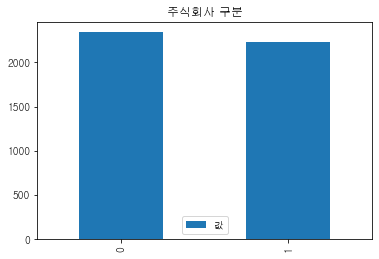

In [38]:
nndf.plot(kind = 'bar', title = '주식회사 구분')
plt.show()

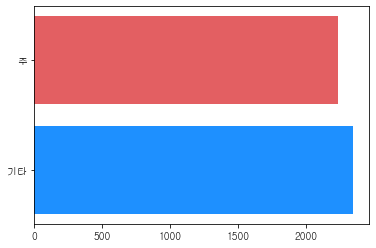

In [39]:
y = np.arange(2)
colors = ['dodgerblue', '#e35f62']
plt.title = ("주식회사 구분")
plt.barh(y, nlist, color=colors)
plt.yticks(y, nlabel)
plt.title = ('주식회사 구분')
plt.show()

In [40]:
df

,회사명,공장대표주소,업종명,생산품,구,구분
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구,기타
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구,기타
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회,기타
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회,기타
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구,기타
...,...,...,...,...,...,...
4569,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,성산구,기타
4570,히트케이(주),"경상남도 창원시 마산합포구 3·15대로 298, 504호(서성동, 경남대학교 창업보육관)",그 외 기타 전자부품 제조업,면상발열체 모듈,마산합,주
4571,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,성산구,기타
4572,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,의창구,기타


In [41]:
gglist = [284, 1753, 1252, 395, 890]
gglabel = ['진해구', '성산구', '의창구', '마산합포구', '마산회원구']


In [42]:
df['구'].value_counts()

성산구    1753
의창구    1252
마산회     890
마산합     395
진해구     284
Name: 구, dtype: int64

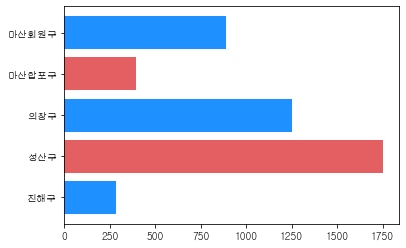

In [43]:
y = np.arange(5)
colors = ['dodgerblue', '#e35f62', 'dodgerblue', '#e35f62', 'dodgerblue']
plt.barh(y, gglist, color=colors)
plt.yticks(y, gglabel)

plt.show()

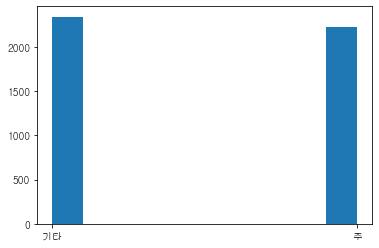

In [44]:
fig = plt.figure()
axis1 = fig.add_subplot(1, 1, 1)

axis1.hist(df['구분'])
plt.show()

In [45]:
whatlist = []

jelist = df.업종명.str.contains('제조업').tolist()
galist = df.업종명.str.contains('가공업').tolist()
culist = df.업종명.str.contains('처리업').tolist()
dolist = df.업종명.str.contains('도금업').tolist()
inlist = df.업종명.str.contains('인쇄업').tolist()

for i in range(len(jelist)):
    if jelist[i] == True:
        jelist[i] = '제조업'
        
for i in range(len(jelist)):
    if galist[i] == True:
        jelist[i] = '가공업'
        
for i in range(len(jelist)):
    if culist[i] == True:
        jelist[i] = '처리업'
        
for i in range(len(jelist)):
    if inlist[i] == True:
        jelist[i] = '인쇄업'
    
        
for i in range(len(jelist)):
    if dolist[i] == True:
        jelist[i] = '도금업'
        
for i in range(len(jelist)):
    if jelist[i] == False:
        jelist[i] = '기타'
        
        
jelist

['제조업',
 '제조업',
 '기타',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '처리업',
 '제조업',
 '기타',
 '제조업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '도금업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '기타',
 '처리업',
 '처리업',
 '제조업',
 '제조업',
 '가공업',
 '가공업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '인쇄업',
 '제조업',
 '제조업',
 '제조업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '기타',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '가공업',
 '가공업',
 '제조업',
 '가공업',
 '처리업',
 '제조업',
 '제조업',
 '제조업',
 '제조업',
 '처리

In [46]:
df['업종'] = jelist

In [47]:
df

,회사명,공장대표주소,업종명,생산품,구,구분,업종
0,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",진해구,기타,제조업
1,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),성산구,기타,제조업
2,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,마산회,기타,기타
3,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",마산회,기타,제조업
4,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,성산구,기타,제조업
...,...,...,...,...,...,...,...
4569,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,성산구,기타,인쇄업
4570,히트케이(주),"경상남도 창원시 마산합포구 3·15대로 298, 504호(서성동, 경남대학교 창업보육관)",그 외 기타 전자부품 제조업,면상발열체 모듈,마산합,주,제조업
4571,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,성산구,기타,가공업
4572,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,의창구,기타,제조업


In [48]:
df['업종'].value_counts()

제조업    3529
처리업     690
가공업     127
기타      110
인쇄업      63
도금업      55
Name: 업종, dtype: int64

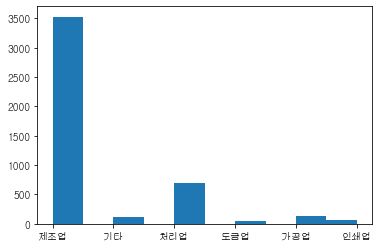

In [49]:
fig = plt.figure()
axis1 = fig.add_subplot(1, 1, 1)

axis1.hist(df['업종'])
plt.show()

In [50]:
bilist = df.생산품.str.contains('자동차').tolist()

for i in range(len(bilist)):
    if bilist[i] == True:
        bilist[i] = '자동차'
bilist

[False,
 False,
 '자동차',
 False,
 '자동차',
 False,
 '자동차',
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 '자동차',
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 '자동차',
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 '자동차',
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 '자동차',
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 '자동차',
 False,
 False,
 False,
 False,
 '자동차',
 False,
 False,
 '자동차',
 False,
 False,
 '자동차',
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 '자동차',


In [51]:
# # 데이터프레임 주소값 추출
# address= csv['소재지도로명주소']
# print(address.head())
jusolist = df.공장대표주소.tolist()

In [54]:
# # 주소 데이터 깔끔하게 다듬기
for i in range(4574):
    a = jusolist[i].split(' ')
    jusolist[i] = " ".join(a[0:5])
print(jusolist)

####### 도로명주소 위도 경도 값으로 바꿔주기 ########
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')
# 위도, 경도 반환하는 함수
def geocoding(jusolist):
    geo = geo_local.geocode(jusolist)
    x_y = [geo.latitude, geo.longitude]
    return x_y




#####주소를 위,경도 값으로 변환하기 #####
latitude = []
longitude =[]

for i in jusolist:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

#####Dataframe만들기######
address_df = pd.DataFrame({'카페이름': csv['사업장명'],'상세주소':csv['소재지도로명주소'],'주소':jusolist,'위도':latitude,'경도':longitude})

['경상남도 창원시 진해구 웅천동로', '경상남도 창원시 성산구 연덕로27번길', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 마산회원구 봉암공단9길', '경상남도 창원시 성산구 반월로', '경상남도 창원시 의창구 태복산로7번길', '경상남도 창원시 성산구 정동로62번길', '경상남도 창원시 마산합포구 진북면', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 의창구 차룡단지로', '경상남도 창원시 마산합포구 진북면', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 마산회원구 봉암공단7길', '경상남도 창원시 마산회원구 봉암공단4길', '경상남도 창원시 마산회원구 봉암공단로', '경상남도 창원시 마산회원구 회원동16길', '경상남도 창원시 마산회원구 봉암공단5길', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 마산회원구 봉암공단5길', '경상남도 창원시 진해구 웅천서로41번길', '경상남도 창원시 마산회원구 봉암공단5길', '경상남도 창원시 마산회원구 봉암북7길', '경상남도 창원시 마산합포구 진북면', '경상남도 창원시 성산구 성주로137번길', '경상남도 창원시 마산회원구 봉암공단4길', '경상남도 창원시 의창구 팔용로345번길', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 성산구 곰절길18번길', '경상남도 창원시 의창구 죽전로', '경상남도 창원시 성산구 곰절길28번길', '경상남도 창원시 의창구 북면', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 의창구 대산면', '경상남도 창원시 마산회원구 자유무역3길', '경상남도 창원시 마산합포구 진북면', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 마산회원구 내서읍', '경상남도 창원시 의창구 창원대로18번길', '경상남도 창원시 의창구 평산로', '경상남도 창원시 마산회원구 자유무역3길', '경상남도 창원시 의창구 평산로38번길', '경상남도 창원시 의창구 평산로38번길', '경상남도

AttributeError: 'NoneType' object has no attribute 'latitude'

In [53]:
address_df 

NameError: name 'address_df' is not defined